# 05: Predicting from Data: Logistic regression

# Outline of ECE 3

- 01: Welcome to Python
- 02: Computing with Data in Python
- 03: Summarizing Data in Python
- **04: Predicting from Data with Machine Learning in Python**
  - A. Clustering
  - B. Linear regression
  - **C. Classification** (not Principal Component Analysis)

## 🦃 Thanksgiving 🦃
- No lecture on Wednesday 11/22
- No labs or TA OH this week 
- HW 7 is due the **next** Thursday 11/30

- **04: Predicting from Data with Machine Learning in Python**
  - **C. Classification **
    - Logistic regression
    - Multinomial logistic regression
    - Gradient descent and neural networks

First, lets quick refresh on where we are in unit 4.

### Unsupervised Learning in ML

$\color{#EF5645}{\text{Definition}}$: _Unsupervised learning_ refers to the task of discovering any naturally occuring patterns in a dataset of data points $x$. We say that the method is:
- a _clustering_: if we want to find groups (clusters), (e.g. find the different diseases that exist within one dataset of brain images),
- a _dimension reduction_: if we want to find the main sources of data variations (e.g., what are the main variations in the shape of a brain?)

### Supervised Learning in ML


$\color{#EF5645}{\text{Definition}}$: _Supervised learning_ refers to the task of learning a function that maps an input $X$ to an output $Y$ based on examples of input-outputs. The method is:
- a _classification_ if outputs are categorical, (e.g., predict if a patient has Alzheimer's from its MRI)
- a _regression_ if quantitative (e.g., predict the age of a patient from its MRI).

<center><img src="figs/03_sl2.png" width=900px alt="default"/></center>
<center>Supervised Learning</center>

Let's consider an example:

*A group of 20 law students spend between 0 and 6 hours studying for their bar exam. How does the number of hours spent studying affect the probability of the student passing the bar exam?*

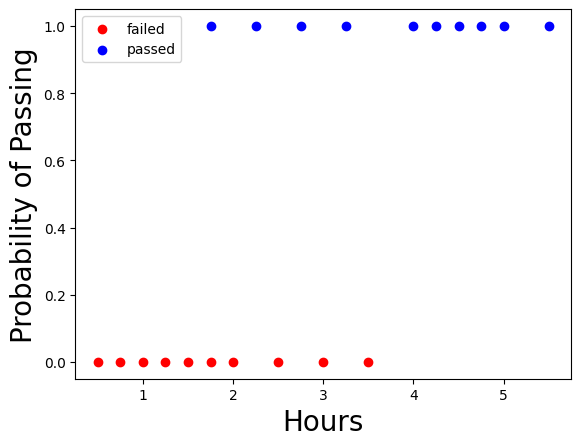

In [1]:
import numpy as np
import matplotlib.pyplot as plt

hours = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
score = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

failed = score == 0
passed = score == 1

plt.scatter(hours[failed], score[failed], c='red', label="failed")
plt.scatter(hours[passed], score[passed], c='blue', label="passed")
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Probability of Passing", fontsize=20)
plt.legend()

We could try performing linear regression to regress ```hours``` onto ```passed```?

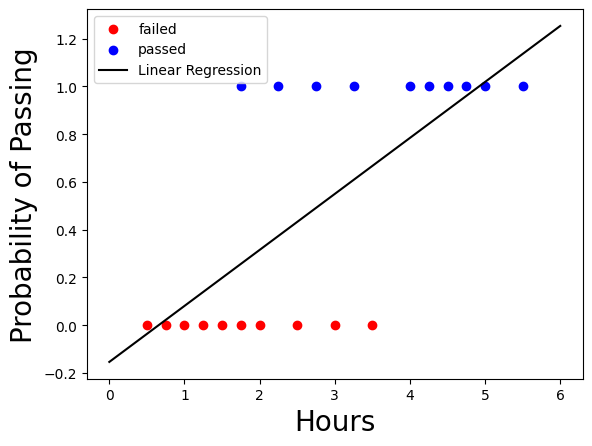

In [2]:
from scipy import stats

plt.scatter(hours[failed], score[failed], c='red', label="failed")
plt.scatter(hours[passed], score[passed], c='blue', label="passed")

fit = stats.linregress(hours, score)
intercept = fit.intercept
slope = fit.slope

xx = np.linspace(0, 6, 100)
yy = slope * xx + intercept
plt.plot(xx, yy, color='black', label="Linear Regression")

plt.xlabel("Hours", fontsize=20)
plt.ylabel("Probability of Passing", fontsize=20)
plt.legend()

There is an issue with this model it predicts that the probability of passing could be less than zero or greater than one, which is not possible.  How can we fix this?

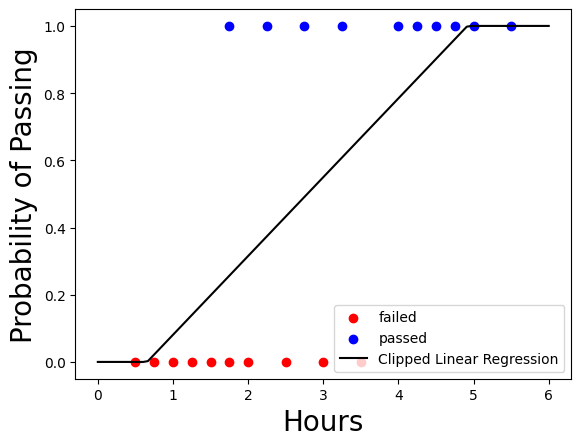

In [4]:
plt.scatter(hours[failed], score[failed], c='red', label="failed")
plt.scatter(hours[passed], score[passed], c='blue', label="passed")


xx = np.linspace(0, 6, 100)
yy = np.clip(slope * xx + intercept, 0, 1)
plt.plot(xx, yy, color='black', label="Clipped Linear Regression")

plt.xlabel("Hours", fontsize=20)
plt.ylabel("Probability of Passing", fontsize=20)
plt.legend()

Still, this doesn't seem quite right. The probability of passing should not be such a sharp transition from failling to passing. It would be better to have a function that is more smooth. This is what logistic regression does!

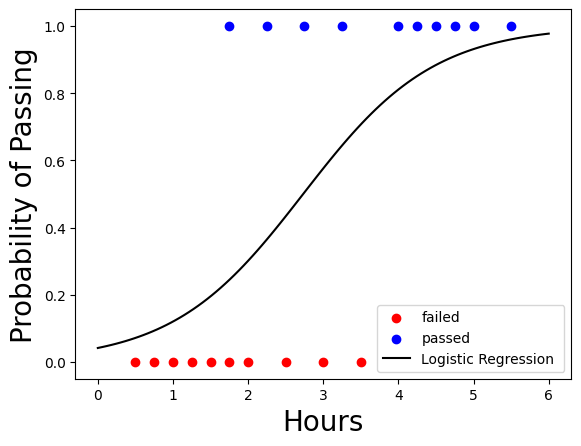

In [5]:
from sklearn.linear_model import LogisticRegression

plt.scatter(hours[failed], score[failed], c='red', label="failed")
plt.scatter(hours[passed], score[passed], c='blue', label="passed")

clf = LogisticRegression(random_state=0).fit(hours[:,None], score)

xx = np.linspace(0, 6, 100)
yy = clf.predict_proba(xx[:,None])[:,1]

plt.plot(xx, yy, color='black', label="Logistic Regression ")

plt.xlabel("Hours", fontsize=20)
plt.ylabel("Probability of Passing", fontsize=20)
plt.legend()

$\color{#EF5645}{\text{Definition}}$: The *sigmoid* function is maps a number $z \in \mathbb{R}$ to a number in $[0,1]$ by the map
$$\sigma(z) = \frac{e^{z}}{e^z + 1} = \frac{1}{1 + e^{-z}}$$

$\color{#EF5645}{\text{Properties}}$: Some properties of the sigmoid are
- When $z \sim 0$, then $\sigma(z) \approx z$
- In the limit as $z \to \infty$, then $\sigma(z) \to 1$
- In the limit as $z \to -\infty$, then $\sigma(z) \to 0$

In [6]:
def sigmoid(z):
    return np.exp(z) / (np.exp(z) + 1)

print(sigmoid(0))

0.5


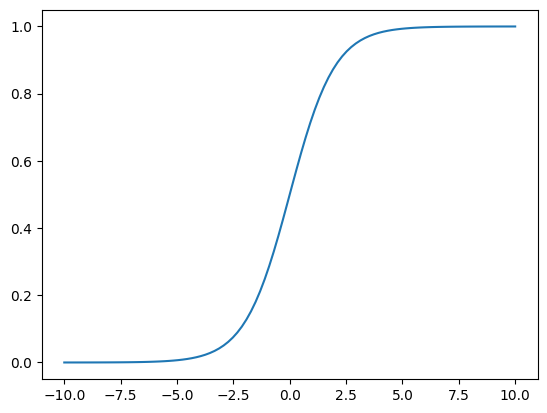

In [7]:
xx = np.linspace(-10, 10, 100)
yy = sigmoid(xx)
plt.plot(xx, yy)

$\color{#EF5645}{\text{Definition}}$: The *logistic function* models the probability $p$ of an event taking place given an input $x \in \mathbb{R}^d$ as the sigmoid of a linear function $z = \beta^\intercal x + \beta_0$,

$$p = \sigma(\beta^\intercal x + \beta_0) = \sigma\left(\sum_{i=0}^n \beta_i x_i\right)$$

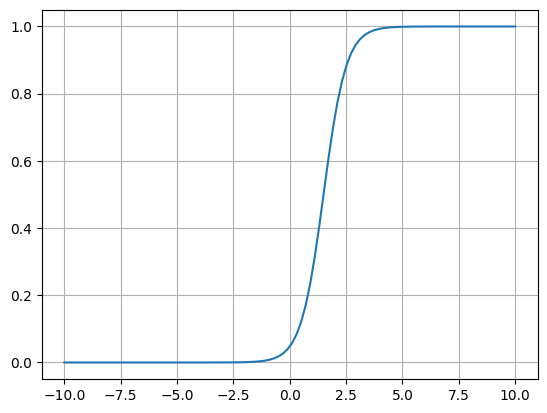

In [8]:
beta0 = -3
beta1 = 2

xx = np.linspace(-10, 10, 100)
yy = sigmoid(beta1 * xx + beta0)
plt.plot(xx, yy)
plt.grid()

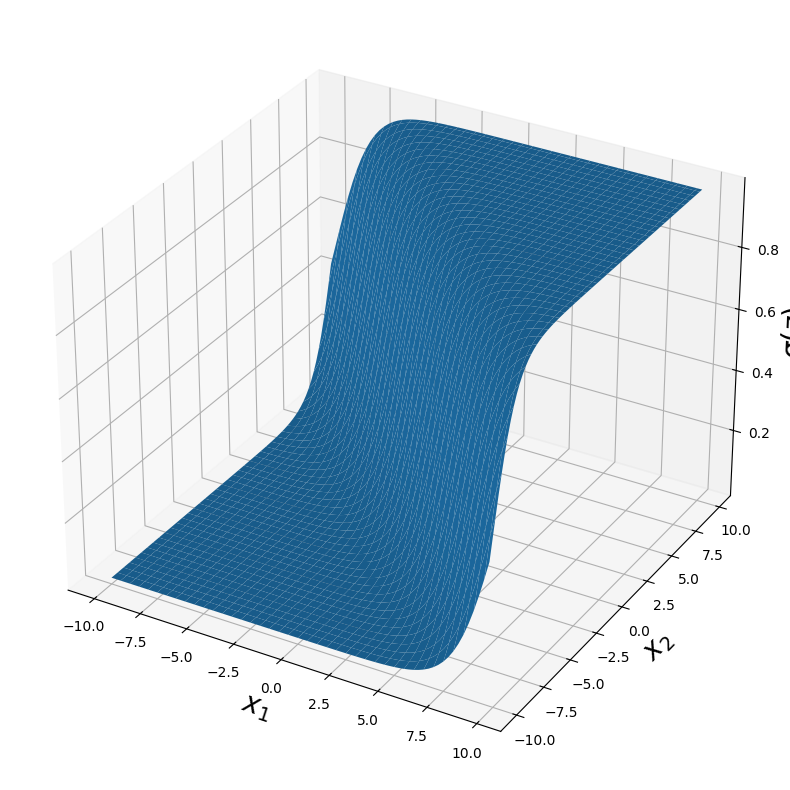

In [9]:
from mpl_toolkits.mplot3d import Axes3D

x1 = np.arange(-10, 10, 0.25)
x2 = np.arange(-10, 10, 0.25)
X1, X2 = np.meshgrid(x1, x2)

beta0, beta1, beta2 = 0, 1, 1

Z = beta0 + beta1 * X1 + beta2 * X2
Z = sigmoid(Z)

# Plot the surface
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z)

ax.set_xlabel(r"$x_1$", fontsize=20)
ax.set_ylabel(r"$x_2$", fontsize=20)
ax.set_zlabel(r"$\sigma(z)$", fontsize=20)
plt.show()

$\color{#EF5645}{\text{Definition}}$: The *decision boundary* is the set of input $\{x \in \mathbb{R}^d | \sigma(\beta^\intercal x) = 0.5\}$, which is equivelent to the $\{x \in \mathbb{R}^d | \beta^\intercal x = 0\}$.

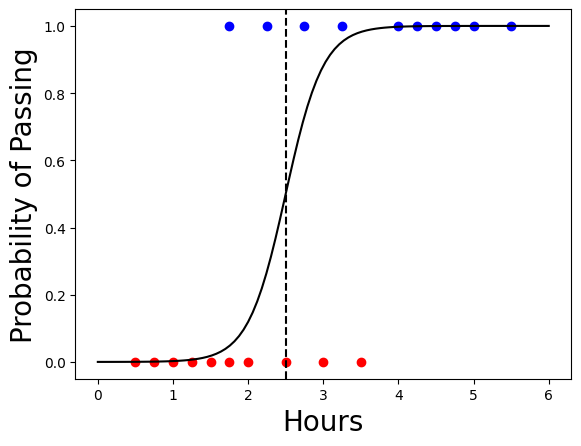

In [10]:
from sklearn.linear_model import LogisticRegression

plt.scatter(hours[failed], score[failed], c='red', label="failed")
plt.scatter(hours[passed], score[passed], c='blue', label="passed")

xx = np.linspace(0, 6, 100)
beta0, beta1 = -10, 4
yy = sigmoid(beta0 + beta1 * xx)


db = -beta0 / beta1
plt.axvline(x=db, ls="--", c='k')

plt.plot(xx, yy, color='black', label="Logistic model")

plt.xlabel("Hours", fontsize=20)
plt.ylabel("Probability of Passing", fontsize=20)
plt.show()

So our goal is to find the logistic function that best *fits* the training data, but how should we compare models?

$\color{#EF5645}{\text{Definition}}$: Logistic regression is the logistic model that solves the following optimization problem

$$\min_{\beta \in \mathbb{R}^d} -\frac{1}{n}\sum_{i=1}^n \left(y_i \log(\sigma(\beta^\intercal x_i)) + (1-y_i)\log(1 - \sigma(\beta^\intercal x_i))\right)$$

The function being minimized is called the *cross-entropy* loss.

$\color{#EF5645}{\text{Remark for fun}}$: Just how linear regression model can be derived through maximum liklihood estimation under an assumed model for our data, the logistic function can be derived from maximum liklihood estimation where we assume the probability of our binary labels $y_i \sim Bernoulli(p)$ and $x_i | y_i \sim Normal(0, \sigma I)$.

$\color{#EF5645}{\text{Remark}}$: Unlike linear regression, this optimization problem does not have an *exact* solution that we can write down.  That said, the solution does exist, but we need to find it through optimization!

<center>
    <img src="figs/logistic_regression_animation.gif" alt="default" width=500px/>
    <img src="figs/logistic_regression_loss_animation.gif" alt="default" width=500px/>
</center>

- **04: Predicting from Data with Machine Learning in Python**
  - **C. Classification **
    - Logistic regression
    - Multinomial logistic regression
    - Gradient descent and neural networks